## Packages

In [15]:
# Import Libraries
from keras import Model

from keras.utils import load_img,img_to_array,array_to_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalMaxPooling2D,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Dense,Flatten,Dropout
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential,load_model,Model
from keras import layers,models
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator                            
from keras.models import Sequential                                                  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras.optimizers import Adam,SGD 
from keras.applications.vgg16 import VGG16
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet import ResNet50

import sys
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import shutil
import glob,os,random
import cv2
import keras
import itertools
import glob,os,random                                                                             
import pandas as pd                                                                           
import math                                                                                     
import cv2    
import matplotlib.pyplot as plot
                                                                           
                              
import warnings
warnings.filterwarnings('ignore')


# Data

In [16]:
Train_data = "D:/fast food/Fast Food Classification V2/Train/"
Valid_data = "D:/fast food/Fast Food Classification V2/Valid/"
Test_data = "D:/fast food/Fast Food Classification V2/Test/"

In [17]:
# Collate the class names
class_names = os.listdir(Train_data)
no_classes = len(class_names)

# Print
print(f"No of Classes : {no_classes}")
print(f"Classes names : {class_names}")

No of Classes : 5
Classes names : ['Burger', 'Crispy Chicken', 'Donut', 'Fries', 'Pizza']


# View Images

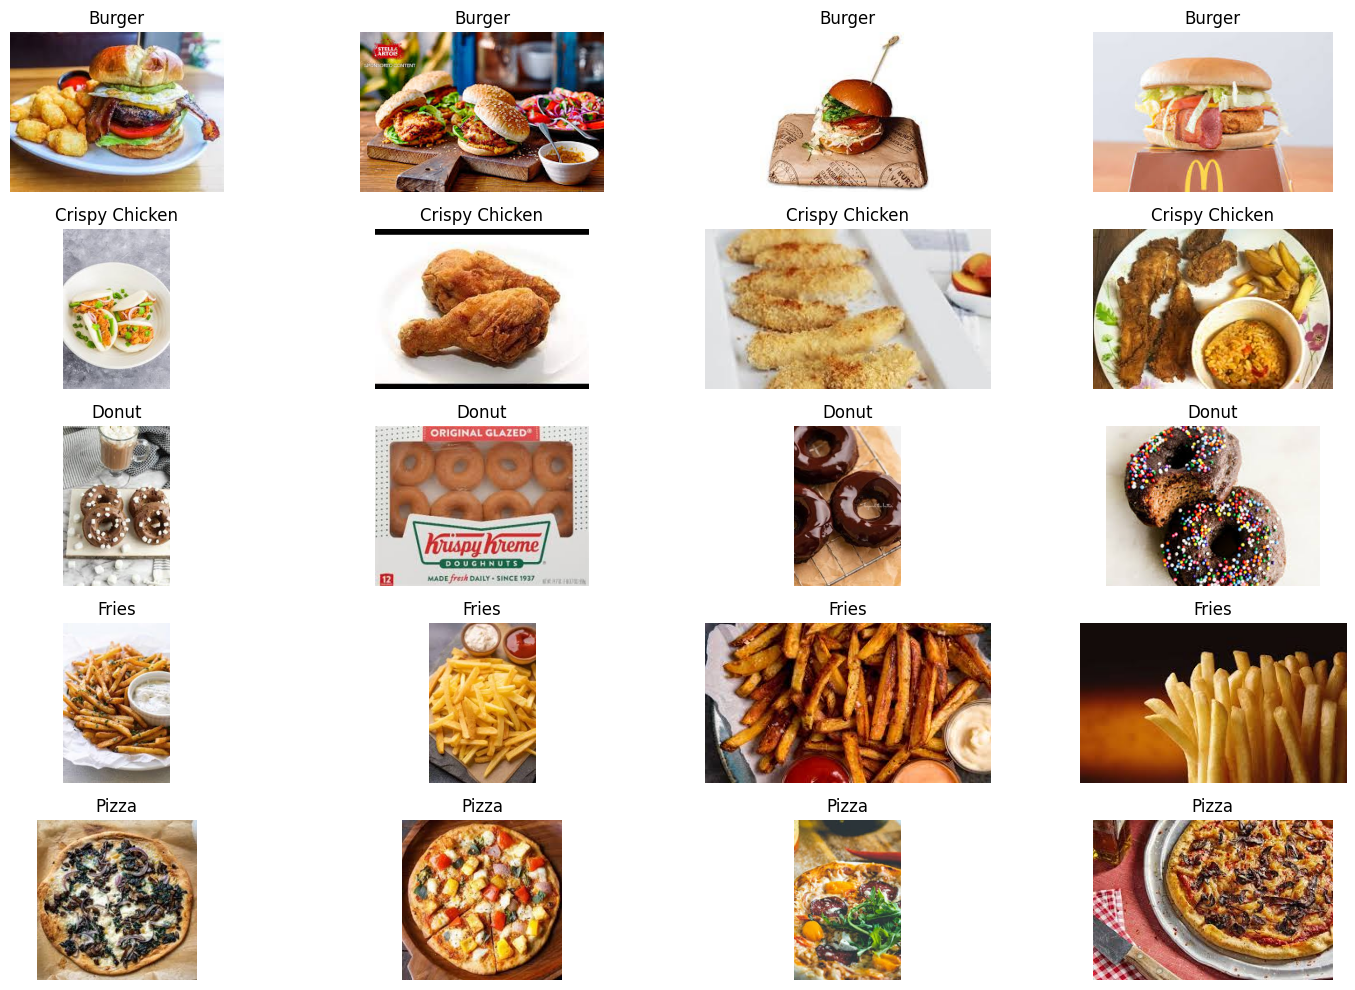

In [18]:
# Create a figure for displaying images
plt.figure(figsize=(15, 10))

# Loop through each class and display 4 random images from it
for i, class_name in enumerate(class_names):
    # Get a list in the class directory
    class_dir = os.path.join(Train_data, class_name)
    image_files = os.listdir(class_dir)
    
    # Display 4 random images from each class
    if image_files:
        images_to_display = random.sample(image_files, 4)
        for j, image_file in enumerate(images_to_display):
            image_path = os.path.join(class_dir, image_file)
            img = mpimg.imread(image_path)
            
            # Add a subplot for each image
            plt.subplot(5, 4, i * 4 + j + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
# Defining Class distribution plot function

def plot_class_distribution(data_dir, class_names, title):
    """
    Plot the class distribution of a dataset.

    Parameters:
    - data_dir (str): Directory containing subdirectories for each class.
    - class_names (list): List of class names.

    Returns:
    - None (displays the histogram plot).
    """
    # Calculate the class distribution
    class_dis = [len(os.listdir(os.path.join(data_dir, name))) for name in class_names]

    # Define a color map 
    colors = plt.cm.tab20(np.arange(len(class_names)))

    # Create a histogram with different colors for each class
    plt.figure(figsize=(8, 5))
    plt.bar(class_names, class_dis, color=colors)
    plt.xlabel('Class Names')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility 
    plt.tight_layout()

    # Show the histogram
    plt.show()

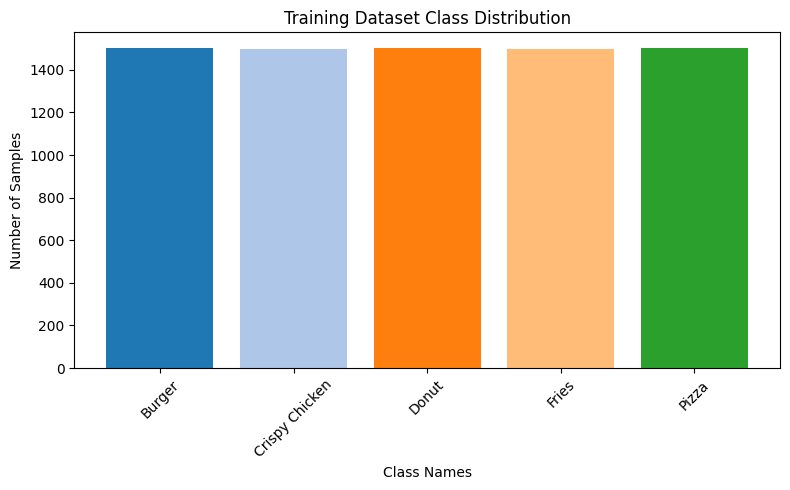

In [20]:
# Calling Class distribution plot function on Training dataset
plot_class_distribution(Train_data, class_names, 'Training Dataset Class Distribution' )

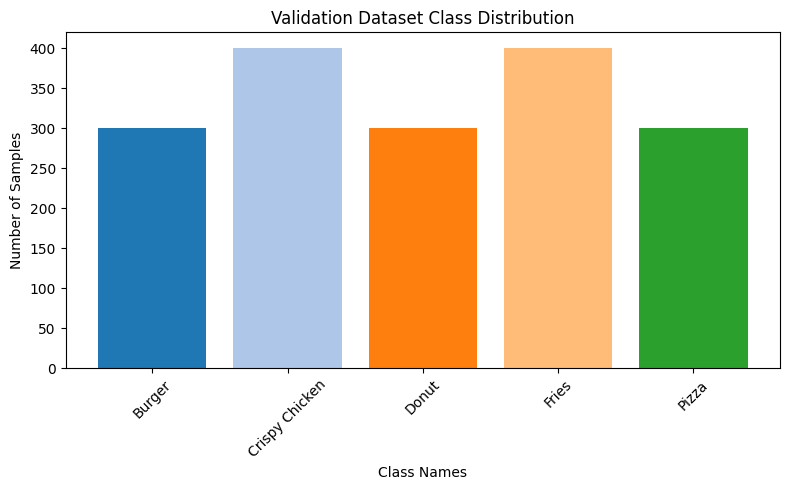

In [21]:
# Calling Class distribution plot function on Validation dataset
plot_class_distribution(Valid_data, class_names, 'Validation Dataset Class Distribution')

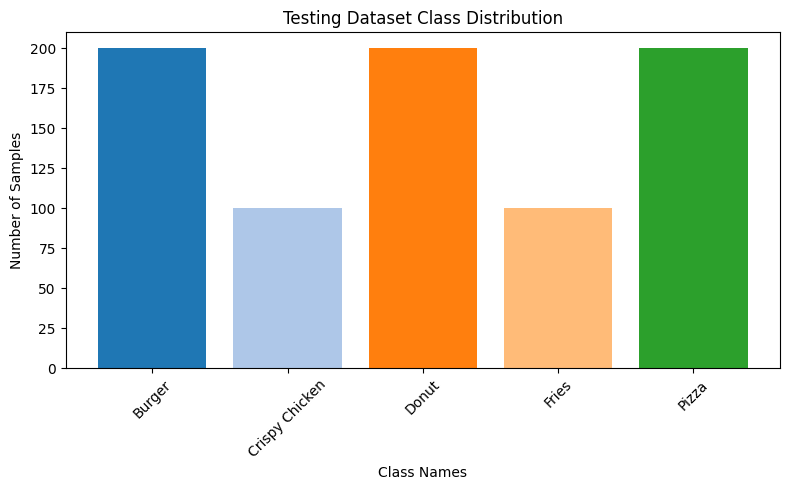

In [22]:
# Calling Class distribution plot function on Testing dataset
plot_class_distribution(Test_data, class_names, 'Testing Dataset Class Distribution')

In [23]:
# Data Augmentation

trainDataGenerator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.1,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

validDataGenerator = ImageDataGenerator(
    rescale = 1./255,
)

testDataGenerator = ImageDataGenerator(
    rescale = 1./255,
)


In [24]:
# Defining data generator

train_set = trainDataGenerator.flow_from_directory(Train_data,
                                                    target_size=(200, 200),
                                                    batch_size=32,
                                                    class_mode='categorical')
    
validation_set = trainDataGenerator.flow_from_directory(Valid_data,
                                                   target_size=(200, 200),
                                                   batch_size=32,
                                                   shuffle=False,
                                                   class_mode='categorical')

test_set = testDataGenerator.flow_from_directory(Test_data,
                                                  target_size=(200, 200),
                                                  batch_size=32,
                                                  shuffle=False,
                                                  class_mode='categorical')

Found 7500 images belonging to 5 classes.
Found 1700 images belonging to 5 classes.
Found 800 images belonging to 5 classes.


In [25]:
# Creating callback 

earlyStoping = EarlyStopping(monitor = 'val_accuracy',patience = 5,verbose = 2)

cb = [earlyStoping]

### Base Model

In [26]:
# CNN Base Model Architecture
baseModel = models.Sequential()

baseModel.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (200,200,3)))
baseModel.add(layers.MaxPooling2D((2,2)))

baseModel.add(layers.Conv2D(64,(3,3),activation = 'relu'))
baseModel.add(layers.MaxPooling2D((2,2)))

baseModel.add(layers.Conv2D(64,(3,3),activation = 'relu'))
baseModel.add(layers.Flatten())

baseModel.add(layers.Dense(64, activation = 'relu'))
baseModel.add(layers.Dense(5, activation = 'softmax'))

baseModel.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 135424)           

In [27]:
# Compile  the base model
baseModel.compile(optimizer =  tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss = 'categorical_crossentropy',metrics = 'accuracy')

In [28]:
# Base Model Training
baseModelHistory = baseModel.fit(train_set, epochs=20,validation_data = validation_set,callbacks = cb)

Epoch 1/20
235/235 [==============================] - 100s 424ms/step - loss: 1.3885 - accuracy: 0.3969 - val_loss: 1.2389 - val_accuracy: 0.4965
Epoch 2/20
235/235 [==============================] - 40s 171ms/step - loss: 1.2189 - accuracy: 0.5071 - val_loss: 1.1242 - val_accuracy: 0.5394
Epoch 3/20
235/235 [==============================] - 40s 171ms/step - loss: 1.1310 - accuracy: 0.5517 - val_loss: 1.1011 - val_accuracy: 0.5753
Epoch 4/20
235/235 [==============================] - 40s 171ms/step - loss: 1.0575 - accuracy: 0.5872 - val_loss: 0.9399 - val_accuracy: 0.6312
Epoch 5/20
235/235 [==============================] - 40s 171ms/step - loss: 1.0080 - accuracy: 0.6069 - val_loss: 0.9030 - val_accuracy: 0.6494
Epoch 6/20
235/235 [==============================] - 41s 174ms/step - loss: 0.9757 - accuracy: 0.6260 - val_loss: 0.9533 - val_accuracy: 0.6412
Epoch 7/20
235/235 [==============================] - 40s 172ms/step - loss: 0.9310 - accuracy: 0.6397 - val_loss: 0.9447 - val_a

In [29]:
# Base Model Evaluation
loss,acc = baseModel.evaluate(validation_set)
print(f'Obtained accuracy {acc}')

54/54 [==============================] - 15s 269ms/step - loss: 0.6786 - accuracy: 0.7606
Obtained accuracy 0.7605882287025452


### Plot Evaluation Graph

In [30]:
# Defining Loss Plot function
def getEvaluationLossGraph(history,title):
    fig = plot.figure(dpi=150, figsize = (10,7))
    ax1 = fig.add_subplot(221)

    ax1.plot(history.history['loss'], label='train_loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.legend(loc='center right')

    plot.xlabel('Epoch')
    plot.ylabel('Loss')

    ax1.set_title(title)

    plot.show()

In [31]:
# Defining Accuracy Plot function
def getEvaluationAccuracyGraph(history,title):
    fig = plot.figure(dpi=150, figsize = (8,6))
    ax1 = fig.add_subplot(221)

    ax1.plot(history.history['accuracy'], label='train_accuracy')
    ax1.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax1.legend(loc='center right')

    plot.xlabel('Epoch')
    plot.ylabel('Accuracy')

    ax1.set_title(title)

    plot.show()

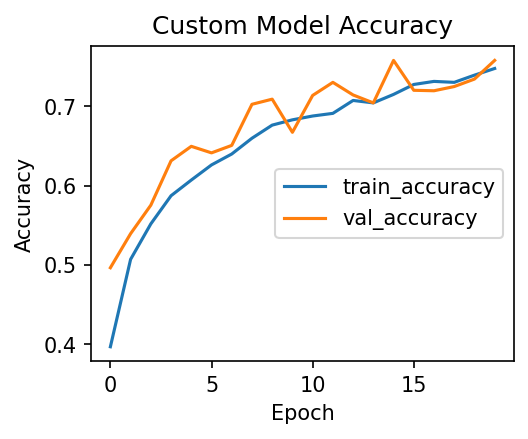

In [32]:
# Plot Base Model Accuracy Graph
getEvaluationAccuracyGraph(baseModelHistory,'Custom Model Accuracy')

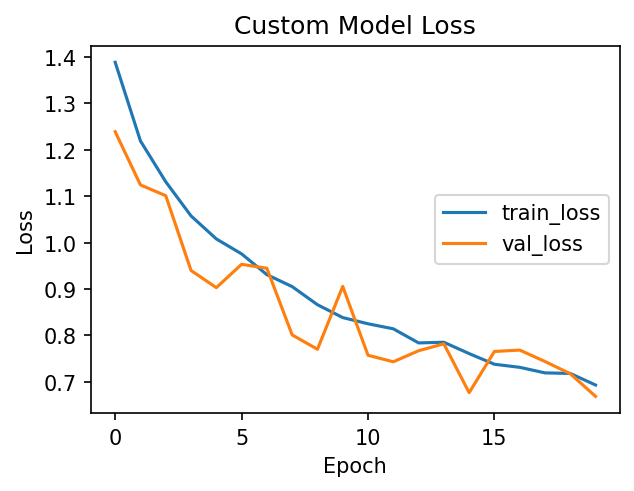

In [33]:
# Plot Base Model Loss Graph
getEvaluationLossGraph(baseModelHistory,'Custom Model Loss')

### Confusion Matrix

In [34]:
#confusion matrix plot function 
def plot_confusion_matrix(cm, classes, normalize=False,  title='Confusion Matrix', cmap=plot.cm.Blues):
    plot.imshow(cm, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.rcParams["figure.figsize"] = (6,6)
    plot.colorbar()
    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plot.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    plot.tight_layout()
    plot.ylabel('True label')
    plot.xlabel('Predicted label')

In [35]:
categories = train_set.class_indices
categories = [key for key,value in categories.items()]

                precision    recall  f1-score   support

        Burger       0.71      0.78      0.74       300
Crispy Chicken       0.83      0.75      0.79       400
         Donut       0.71      0.95      0.81       300
         Fries       0.81      0.63      0.71       400
         Pizza       0.73      0.70      0.71       300

      accuracy                           0.75      1700
     macro avg       0.76      0.76      0.75      1700
  weighted avg       0.76      0.75      0.75      1700

[[234  12  36  11   7]
 [ 30 301   8  24  37]
 [  7   2 286   2   3]
 [ 49  16  50 253  32]
 [ 10  32  25  24 209]]


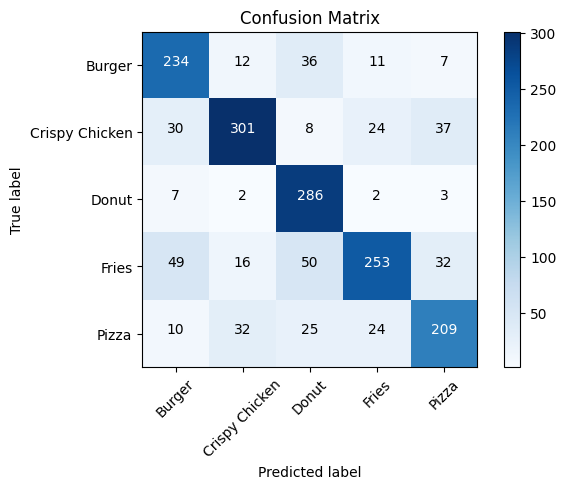

In [36]:
# Classification report and Confusion matrix
prediction = baseModel.predict(x = validation_set, verbose=0)
prediction  = np.argmax(prediction, axis =1 )

print(classification_report(y_true = validation_set.classes,y_pred = prediction, target_names = categories))

baseCM =confusion_matrix(validation_set.classes, prediction)
plot_confusion_matrix(cm=baseCM, classes=categories)

# Pretrained Models

- RESNET152v2
- VGG16
- DENSENET

### ResNet 152V2

In [38]:
# Resnet152V2 Model Architecture

resnetModel = ResNet152V2(include_top=False,weights='imagenet', input_shape=(200, 200,3))

# Preventing training of the pretrained model
for layer in resnetModel.layers:
     layer.trainable = False

# Add a global maximum pooling layer
x = GlobalMaxPooling2D()(resnetModel.output)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)

# Add dropout to prevent overfitting
x = Dropout(0.3)(x)

output = Dense(5, activation='softmax')(x)


resnet152Model = Model(inputs = resnetModel.input, outputs=output)

resnet152Model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# display the architecture of the model
resnet152Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 50, 50, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 50, 50, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 50, 50, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 25, 25, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 25, 25, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 25, 25, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, 25, 25, 128)  512        ['conv3_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 27, 27, 128)  0          ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_blo

                                                                  'conv3_block7_3_conv[0][0]']    
                                                                                                  
 conv3_block8_preact_bn (BatchN  (None, 25, 25, 512)  2048       ['conv3_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 25, 25, 512)  0          ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 25, 25, 128)  65536       ['conv3_block8_preact_relu[0][0]'
                                                                 ]                                
          

 n)                                                                                               
                                                                                                  
 conv4_block2_2_pad (ZeroPaddin  (None, 15, 15, 256)  0          ['conv4_block2_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 13, 13, 256)  589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block5_preact_bn (BatchN  (None, 13, 13, 1024  4096       ['conv4_block4_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block5_preact_relu (Acti  (None, 13, 13, 1024  0          ['conv4_block5_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 13, 13, 256)  262144      ['conv4_block5_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 13, 13, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 13, 13, 1024  263168      ['conv4_block7_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_blo

 conv4_block10_1_conv (Conv2D)  (None, 13, 13, 256)  262144      ['conv4_block10_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block10_1_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_1_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_pad (ZeroPaddi  (None, 15, 15, 256)  0          ['conv4_block10_1_relu[0][0]']   
 ng2D)    

                                                                                                  
 conv4_block12_3_conv (Conv2D)  (None, 13, 13, 1024  263168      ['conv4_block12_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block12_out (Add)        (None, 13, 13, 1024  0           ['conv4_block11_out[0][0]',      
                                )                                 'conv4_block12_3_conv[0][0]']   
                                                                                                  
 conv4_block13_preact_bn (Batch  (None, 13, 13, 1024  4096       ['conv4_block12_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_blo

 conv4_block15_1_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_pad (ZeroPaddi  (None, 15, 15, 256)  0          ['conv4_block15_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 13, 13, 256)  589824      ['conv4_block15_2_pad[0][0]']    
                                                                                                  
 conv4_block15_2_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block15_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block18_preact_bn (Batch  (None, 13, 13, 1024  4096       ['conv4_block17_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block18_preact_relu (Act  (None, 13, 13, 1024  0          ['conv4_block18_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, 13, 13, 256)  262144      ['conv4_block18_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_blo

 conv4_block20_2_conv (Conv2D)  (None, 13, 13, 256)  589824      ['conv4_block20_2_pad[0][0]']    
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block20_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_2_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block20_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_3_conv (Conv2D)  (None, 13, 13, 1024  263168      ['conv4_block20_2_relu[0][0]']   
                                )                                                                 
          

                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 13, 13, 256)  262144      ['conv4_block23_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block23_1_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block23_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 on)                                                                                              
                                                                                                  
 conv4_block25_3_conv (Conv2D)  (None, 13, 13, 1024  263168      ['conv4_block25_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block25_out (Add)        (None, 13, 13, 1024  0           ['conv4_block24_out[0][0]',      
                                )                                 'conv4_block25_3_conv[0][0]']   
                                                                                                  
 conv4_block26_preact_bn (Batch  (None, 13, 13, 1024  4096       ['conv4_block25_out[0][0]']      
 Normalization)                 )                                                                 
          

                                                                                                  
 conv4_block28_1_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_pad (ZeroPaddi  (None, 15, 15, 256)  0          ['conv4_block28_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 13, 13, 256)  589824      ['conv4_block28_2_pad[0][0]']    
                                                                                                  
 conv4_block28_2_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block28_2_conv[0][0]']   
 lization)

                                )                                 'conv4_block30_3_conv[0][0]']   
                                                                                                  
 conv4_block31_preact_bn (Batch  (None, 13, 13, 1024  4096       ['conv4_block30_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block31_preact_relu (Act  (None, 13, 13, 1024  0          ['conv4_block31_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 13, 13, 256)  262144      ['conv4_block31_preact_relu[0][0]
                                                                 ']                               
          

                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 13, 13, 256)  589824      ['conv4_block33_2_pad[0][0]']    
                                                                                                  
 conv4_block33_2_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block33_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_2_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_3_conv (Conv2D)  (None, 13, 13, 1024  263168      ['conv4_block33_2_relu[0][0]']   
          

 ivation)                       )                                                                 
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, 13, 13, 256)  262144      ['conv4_block36_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_1_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block36_1_bn[0][0]']     
 on)                                                                                              
          

 conv5_block2_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
          

In [39]:
# Train the Resnet152V2 model
resNetModel152History = resnet152Model.fit(train_set, epochs=20, validation_data = validation_set, callbacks = cb)

Epoch 1/20
235/235 [==============================] - 88s 342ms/step - loss: 2.0804 - accuracy: 0.7184 - val_loss: 1.0237 - val_accuracy: 0.8153
Epoch 2/20
235/235 [==============================] - 77s 329ms/step - loss: 0.8225 - accuracy: 0.8141 - val_loss: 0.8376 - val_accuracy: 0.8035
Epoch 3/20
235/235 [==============================] - 79s 337ms/step - loss: 0.5648 - accuracy: 0.8395 - val_loss: 0.5633 - val_accuracy: 0.8371
Epoch 4/20
235/235 [==============================] - 120s 510ms/step - loss: 0.4884 - accuracy: 0.8485 - val_loss: 0.5430 - val_accuracy: 0.8406
Epoch 5/20
235/235 [==============================] - 78s 330ms/step - loss: 0.4341 - accuracy: 0.8607 - val_loss: 0.4791 - val_accuracy: 0.8571
Epoch 6/20
235/235 [==============================] - 78s 330ms/step - loss: 0.3961 - accuracy: 0.8685 - val_loss: 0.4460 - val_accuracy: 0.8735
Epoch 7/20
235/235 [==============================] - 78s 331ms/step - loss: 0.3629 - accuracy: 0.8819 - val_loss: 0.4872 - val_a

In [40]:
# Resnet152V2 Model evaluation
loss,acc = resnet152Model.evaluate(validation_set)
print(f'Obtained accuracy {acc}')

54/54 [==============================] - 14s 264ms/step - loss: 0.4077 - accuracy: 0.8776
Obtained accuracy 0.8776470422744751


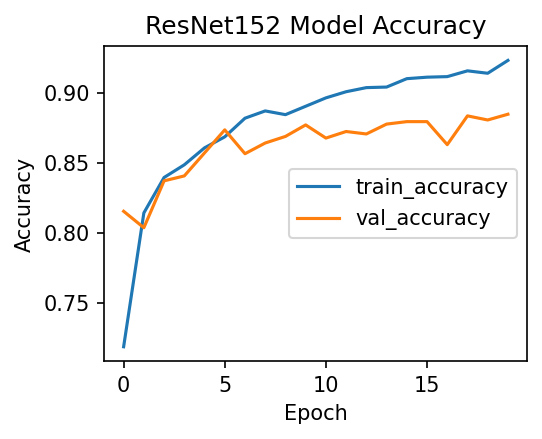

In [41]:
# Calling the Accuracy plot function for Resnet152V2 Model
getEvaluationAccuracyGraph(resNetModel152History,'ResNet152 Model Accuracy')

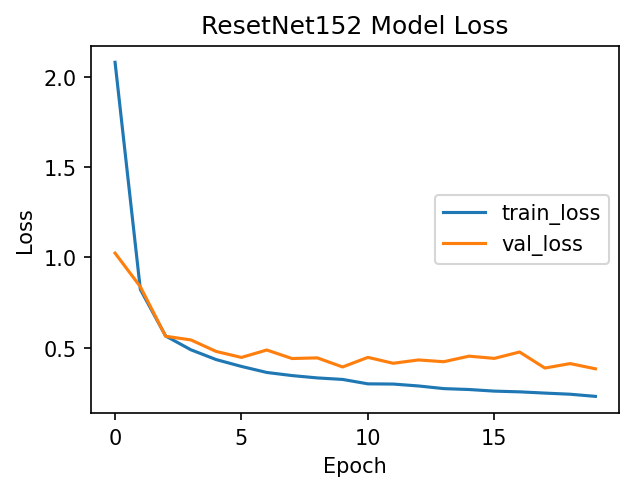

In [42]:
# Calling the Loss plot function for Resnet152V2 Model
getEvaluationLossGraph(resNetModel152History,'ResetNet152 Model Loss')

                precision    recall  f1-score   support

        Burger       0.81      0.91      0.86       300
Crispy Chicken       0.85      0.92      0.88       400
         Donut       0.89      0.93      0.91       300
         Fries       0.94      0.81      0.87       400
         Pizza       0.92      0.84      0.88       300

      accuracy                           0.88      1700
     macro avg       0.88      0.88      0.88      1700
  weighted avg       0.88      0.88      0.88      1700

[[274  11  11   4   0]
 [ 17 366   1   8   8]
 [  7   2 280   7   4]
 [ 33  17  16 323  11]
 [  6  34   5   3 252]]


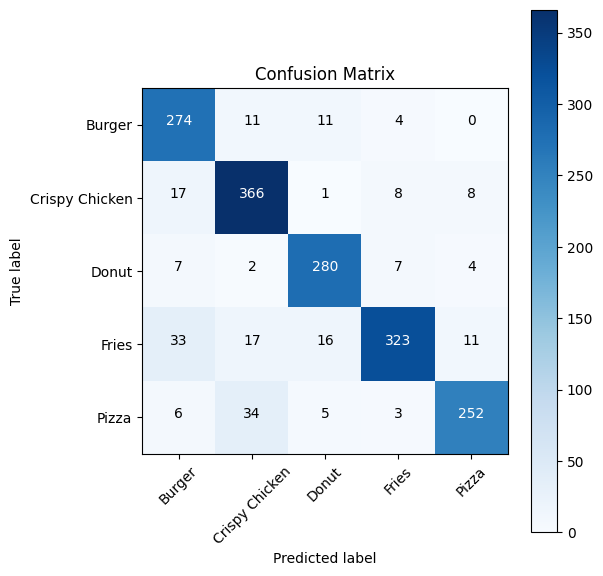

In [43]:
# Classification report and Confusion matrix
resNetPrediction = resnet152Model.predict(x = validation_set, verbose=0)
resNetPrediction  = np.argmax(resNetPrediction, axis =1 )

print(classification_report(y_true = validation_set.classes,y_pred = resNetPrediction, target_names = categories))

reseNetCM =confusion_matrix(validation_set.classes, resNetPrediction)
plot_confusion_matrix(cm=reseNetCM, classes=categories)

### RESNET152v2 with Adamax Optimizer

In [44]:
from keras.optimizers import Adamax

In [45]:
# Resnet152V2 Model Architecture

resnetModel2 = ResNet152V2(include_top=False,weights='imagenet', input_shape=(200, 200,3))

# Preventing training of the pretrained model
for layer in resnetModel2.layers:
     layer.trainable = False

# Add a global maximum pooling layer
x = GlobalMaxPooling2D()(resnetModel2.output)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)

# Add dropout to prevent overfitting
x = Dropout(0.3)(x)

output = Dense(5, activation='softmax')(x)


resnet152Model2 = Model(inputs = resnetModel2.input, outputs=output)

resnet152Model2.compile(optimizer=Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# display the architecture of the model
resnet152Model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 50, 50, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 50, 50, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 50, 50, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 25, 25, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 25, 25, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 25, 25, 512)  66048       ['conv3_block2_2_relu[0][0]']    
          

                                                                 ]                                
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, 25, 25, 128)  512        ['conv3_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 27, 27, 128)  0          ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
          

 conv3_block7_out (Add)         (None, 25, 25, 512)  0           ['conv3_block6_out[0][0]',       
                                                                  'conv3_block7_3_conv[0][0]']    
                                                                                                  
 conv3_block8_preact_bn (BatchN  (None, 25, 25, 512)  2048       ['conv3_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 25, 25, 512)  0          ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 25, 25, 128)  65536       ['conv3_block8_preact_relu[0][0]'
          

                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 13, 13, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_pad (ZeroPaddin  (None, 15, 15, 256)  0          ['conv4_block2_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 13, 13, 256)  589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

                                )                                 'conv4_block4_3_conv[0][0]']    
                                                                                                  
 conv4_block5_preact_bn (BatchN  (None, 13, 13, 1024  4096       ['conv4_block4_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block5_preact_relu (Acti  (None, 13, 13, 1024  0          ['conv4_block5_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 13, 13, 256)  262144      ['conv4_block5_preact_relu[0][0]'
                                                                 ]                                
          

                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 13, 13, 256)  589824      ['conv4_block7_2_pad[0][0]']     
                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 13, 13, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 13, 13, 1024  263168      ['conv4_block7_2_relu[0][0]']    
          

 ivation)                       )                                                                 
                                                                                                  
 conv4_block10_1_conv (Conv2D)  (None, 13, 13, 256)  262144      ['conv4_block10_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block10_1_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_1_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
          

 conv4_block12_2_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block12_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block12_3_conv (Conv2D)  (None, 13, 13, 1024  263168      ['conv4_block12_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block12_out (Add)        (None, 13, 13, 1024  0           ['conv4_block11_out[0][0]',      
                                )                                 'conv4_block12_3_conv[0][0]']   
                                                                                                  
 conv4_block13_preact_bn (Batch  (None, 13, 13, 1024  4096       ['conv4_block12_out[0][0]']      
 Normaliza

 lization)                                                                                        
                                                                                                  
 conv4_block15_1_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_pad (ZeroPaddi  (None, 15, 15, 256)  0          ['conv4_block15_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 13, 13, 256)  589824      ['conv4_block15_2_pad[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block17_out (Add)        (None, 13, 13, 1024  0           ['conv4_block16_out[0][0]',      
                                )                                 'conv4_block17_3_conv[0][0]']   
                                                                                                  
 conv4_block18_preact_bn (Batch  (None, 13, 13, 1024  4096       ['conv4_block17_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block18_preact_relu (Act  (None, 13, 13, 1024  0          ['conv4_block18_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, 13, 13, 256)  262144      ['conv4_block18_preact_relu[0][0]
          

 ng2D)                                                                                            
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 13, 13, 256)  589824      ['conv4_block20_2_pad[0][0]']    
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block20_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_2_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block20_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block23_preact_relu (Act  (None, 13, 13, 1024  0          ['conv4_block23_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 13, 13, 256)  262144      ['conv4_block23_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block23_1_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block23_1_bn[0][0]']     
 on)      

                                                                                                  
 conv4_block25_2_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block25_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_3_conv (Conv2D)  (None, 13, 13, 1024  263168      ['conv4_block25_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block25_out (Add)        (None, 13, 13, 1024  0           ['conv4_block24_out[0][0]',      
                                )                                 'conv4_block25_3_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block28_1_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block28_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block28_1_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_pad (ZeroPaddi  (None, 15, 15, 256)  0          ['conv4_block28_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 13, 13, 256)  589824      ['conv4_block28_2_pad[0][0]']    
          

                                                                                                  
 conv4_block30_out (Add)        (None, 13, 13, 1024  0           ['conv4_block29_out[0][0]',      
                                )                                 'conv4_block30_3_conv[0][0]']   
                                                                                                  
 conv4_block31_preact_bn (Batch  (None, 13, 13, 1024  4096       ['conv4_block30_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block31_preact_relu (Act  (None, 13, 13, 1024  0          ['conv4_block31_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_blo

 conv4_block33_2_pad (ZeroPaddi  (None, 15, 15, 256)  0          ['conv4_block33_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 13, 13, 256)  589824      ['conv4_block33_2_pad[0][0]']    
                                                                                                  
 conv4_block33_2_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block33_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_2_relu (Activati  (None, 13, 13, 256)  0          ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block36_preact_relu (Act  (None, 13, 13, 1024  0          ['conv4_block36_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, 13, 13, 256)  262144      ['conv4_block36_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 13, 13, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 7, 7, 512)    2359296     ['conv5_block2_2_pad[0][0]']     
                                                                                                  
 conv5_block2_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
          

In [46]:
# Train the Resnet152V2 model
resNetModel152History2 = resnet152Model2.fit(train_set, epochs=20, validation_data = validation_set, callbacks = cb)

Epoch 1/20
235/235 [==============================] - 88s 345ms/step - loss: 2.7982 - accuracy: 0.6485 - val_loss: 1.2962 - val_accuracy: 0.7959
Epoch 2/20
235/235 [==============================] - 80s 340ms/step - loss: 1.4535 - accuracy: 0.7701 - val_loss: 0.9987 - val_accuracy: 0.8147
Epoch 3/20
235/235 [==============================] - 79s 337ms/step - loss: 1.0935 - accuracy: 0.8017 - val_loss: 0.8361 - val_accuracy: 0.8306
Epoch 4/20
235/235 [==============================] - 79s 335ms/step - loss: 0.8813 - accuracy: 0.8116 - val_loss: 0.7582 - val_accuracy: 0.8306
Epoch 5/20
235/235 [==============================] - 108s 459ms/step - loss: 0.7760 - accuracy: 0.8164 - val_loss: 0.6462 - val_accuracy: 0.8294
Epoch 6/20
235/235 [==============================] - 95s 403ms/step - loss: 0.6576 - accuracy: 0.8305 - val_loss: 0.6663 - val_accuracy: 0.8341
Epoch 7/20
235/235 [==============================] - 79s 336ms/step - loss: 0.6196 - accuracy: 0.8328 - val_loss: 0.6133 - val_a

In [47]:
# Resnet152V2 Model evaluation
loss,acc = resnet152Model2.evaluate(validation_set)
print(f'Obtained accuracy {acc}')

54/54 [==============================] - 15s 262ms/step - loss: 0.4666 - accuracy: 0.8659
Obtained accuracy 0.8658823370933533


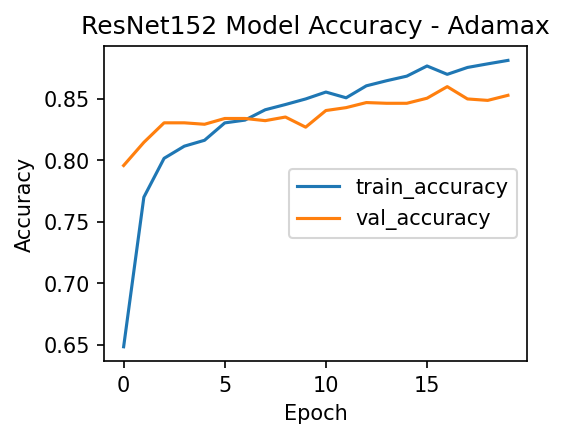

In [48]:
# Calling the Accuracy plot function for Resnet152V2 Model
getEvaluationAccuracyGraph(resNetModel152History2,'ResNet152 Model Accuracy - Adamax')

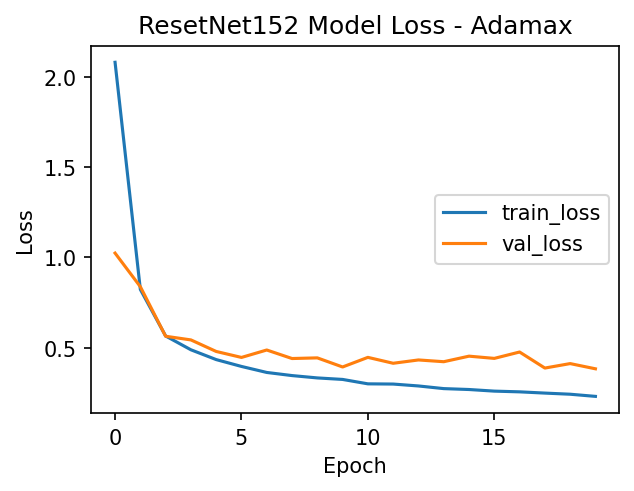

In [49]:
# Calling the Loss plot function for Resnet152V2 Model
getEvaluationLossGraph(resNetModel152History,'ResetNet152 Model Loss - Adamax')

                precision    recall  f1-score   support

        Burger       0.82      0.93      0.87       300
Crispy Chicken       0.87      0.92      0.89       400
         Donut       0.92      0.91      0.91       300
         Fries       0.95      0.82      0.88       400
         Pizza       0.89      0.86      0.87       300

      accuracy                           0.89      1700
     macro avg       0.89      0.89      0.89      1700
  weighted avg       0.89      0.89      0.89      1700

[[279   9   8   3   1]
 [ 20 369   2   3   6]
 [ 10   4 274   4   8]
 [ 28  15  11 329  17]
 [  2  29   4   7 258]]


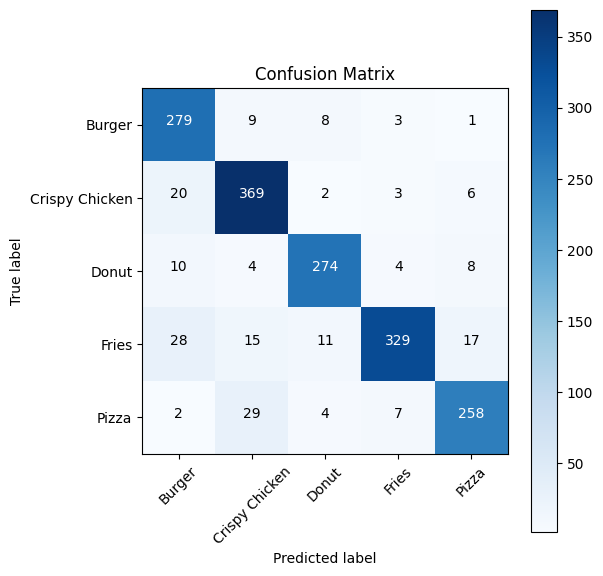

In [50]:
# Classification report and Confusion matrix
resNetPrediction = resnet152Model.predict(x = validation_set, verbose=0)
resNetPrediction  = np.argmax(resNetPrediction, axis =1 )

print(classification_report(y_true = validation_set.classes,y_pred = resNetPrediction, target_names = categories))

reseNetCM =confusion_matrix(validation_set.classes, resNetPrediction)
plot_confusion_matrix(cm=reseNetCM, classes=categories)

# VGG 16

In [51]:
# VGG16 Model Architecture
vggModel = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Preventing training of the pretrained model
for layer in vggModel.layers:
    layer.trainable = False

# Add a global average pooling layer
x = GlobalAveragePooling2D()(vggModel.output)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

# Add a fully connected output layer with multiple classes
predictions = Dense(5, activation='softmax')(x)

# Create the model
vgg16Model = Model(inputs = vggModel.input, outputs=predictions)

# Compile the model
vgg16Model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

vgg16Model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                            

In [52]:
# VGG16 Model Training
vgg16ModelHistory = vgg16Model.fit(train_set, epochs=20, validation_data = validation_set, callbacks = cb)

Epoch 1/20
235/235 [==============================] - 81s 338ms/step - loss: 1.3151 - accuracy: 0.4908 - val_loss: 1.0927 - val_accuracy: 0.6541
Epoch 2/20
235/235 [==============================] - 79s 335ms/step - loss: 0.9740 - accuracy: 0.6699 - val_loss: 0.9272 - val_accuracy: 0.6935
Epoch 3/20
235/235 [==============================] - 78s 333ms/step - loss: 0.8325 - accuracy: 0.7187 - val_loss: 0.8394 - val_accuracy: 0.7100
Epoch 4/20
235/235 [==============================] - 78s 332ms/step - loss: 0.7580 - accuracy: 0.7385 - val_loss: 0.7947 - val_accuracy: 0.7394
Epoch 5/20
235/235 [==============================] - 79s 334ms/step - loss: 0.7051 - accuracy: 0.7553 - val_loss: 0.7754 - val_accuracy: 0.7353
Epoch 6/20
235/235 [==============================] - 118s 501ms/step - loss: 0.6634 - accuracy: 0.7745 - val_loss: 0.7348 - val_accuracy: 0.7471
Epoch 7/20
235/235 [==============================] - 83s 355ms/step - loss: 0.6380 - accuracy: 0.7793 - val_loss: 0.7019 - val_a

In [53]:
# VGG16 Model Evaluation
loss,acc = vgg16Model.evaluate(validation_set)
print(f'Obtained accuracy {acc}')

54/54 [==============================] - 15s 263ms/step - loss: 0.6037 - accuracy: 0.8012
Obtained accuracy 0.8011764883995056


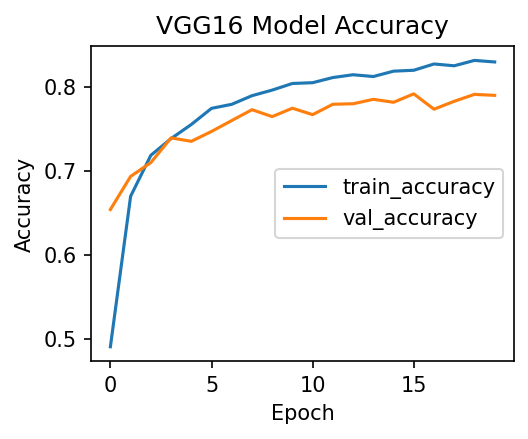

In [54]:
# Calling the Accuracy function for VGG16 Model
getEvaluationAccuracyGraph(vgg16ModelHistory,'VGG16 Model Accuracy')

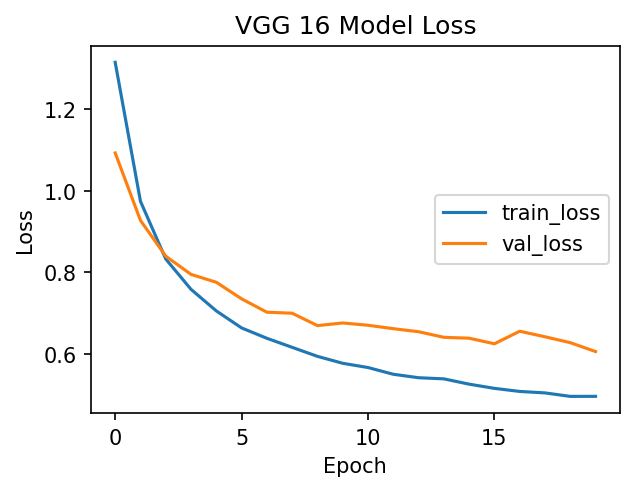

In [55]:
# Calling the Loss function for VGG16 Model
getEvaluationLossGraph(vgg16ModelHistory,'VGG 16 Model Loss')

                precision    recall  f1-score   support

        Burger       0.73      0.81      0.77       300
Crispy Chicken       0.81      0.81      0.81       400
         Donut       0.76      0.83      0.80       300
         Fries       0.84      0.74      0.79       400
         Pizza       0.81      0.78      0.80       300

      accuracy                           0.79      1700
     macro avg       0.79      0.79      0.79      1700
  weighted avg       0.79      0.79      0.79      1700

[[242  27  15  13   3]
 [ 30 323  20  14  13]
 [ 10   7 249  14  20]
 [ 45  16  23 298  18]
 [  4  27  19  16 234]]


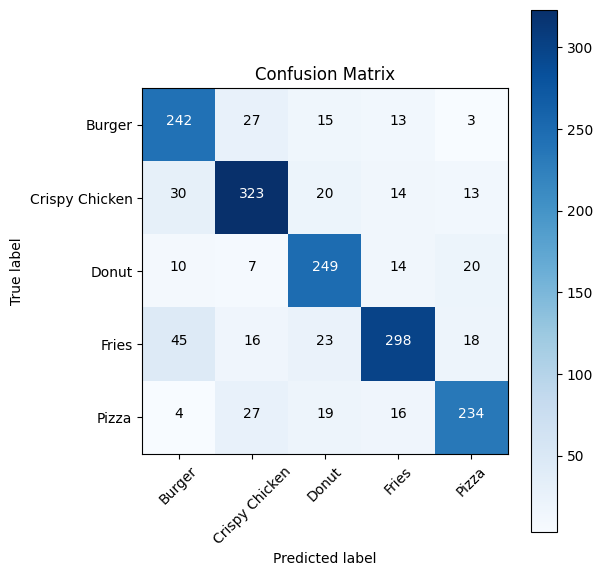

In [56]:
# Classification report and Confusion matrix
vggPrediction = vgg16Model.predict(x = validation_set, verbose=0)
vggPrediction  = np.argmax(vggPrediction, axis =1 )

print(classification_report(y_true = validation_set.classes,y_pred = vggPrediction, target_names = categories))

vggCM =confusion_matrix(validation_set.classes, vggPrediction)
plot_confusion_matrix(cm=vggCM, classes=categories)

In [ ]:
# Classification report and Confusion matrix
vggPrediction2 = vgg16Model2.predict(x = validation_set, verbose=0)
vggPrediction2  = np.argmax(vggPrediction2, axis =1 )

print(classification_report(y_true = validation_set.classes,y_pred = vggPrediction2, target_names = categories))

vggCM =confusion_matrix(validation_set.classes, vggPrediction2)
plot_confusion_matrix(cm=vggCM, classes=categories)

# DenseNet121 Model

In [59]:
from tensorflow.keras.applications import DenseNet121

In [60]:
# DenseNet121 Model Architecture
# Load the DenseNet model without the top fully connected layers
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# This is done to avoid training of the model
for layer in densenet_model.layers:
    layer.trainable = False

# Add a global average pooling layer
x = GlobalAveragePooling2D()(densenet_model.output)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

# Add a fully connected output layer with multiple classes
predictions = Dense(5, activation='softmax')(x)

# Create the model
densenetModel = Model(inputs=densenet_model.input, outputs=predictions)

# Compile the model
densenetModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
densenetModel.summary()

29084464/29084464 [==============================] - 1s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 206, 206, 3)  0          ['input_7[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 100, 100, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                           

                                                                                                  
 conv2_block4_0_relu (Activatio  (None, 50, 50, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 50, 50, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 50, 50, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 50, 50, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 25, 25, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 25, 25, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 25, 25, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_blo

 conv3_block6_1_bn (BatchNormal  (None, 25, 25, 128)  512        ['conv3_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 25, 25, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 25, 25, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
          

                                                                                                  
 conv3_block10_concat (Concaten  (None, 25, 25, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 25, 25, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 25, 25, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 12, 12, 32)   36864       ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_concat (Concatena  (None, 12, 12, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 12, 12, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 12, 12, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block7_0_relu (Activatio  (None, 12, 12, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 12, 12, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 12, 12, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 12, 12, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 12, 12, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 12, 12, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 12, 12, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block15_concat (Concaten  (None, 12, 12, 736)  0          ['conv4_block14_concat[0][0]',   
 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 12, 12, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 12, 12, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 12, 12, 128)  94208       ['conv4_block16_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 12, 12, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 12, 12, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 12, 12, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block24_1_relu (Activati  (None, 12, 12, 128)  0          ['conv4_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 12, 12, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 12, 12, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 12, 12, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
          

 conv5_block4_1_bn (BatchNormal  (None, 6, 6, 128)   512         ['conv5_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 6, 6, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 6, 6, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 6, 6, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
          

                                                                                                  
 conv5_block8_concat (Concatena  (None, 6, 6, 768)   0           ['conv5_block7_concat[0][0]',    
 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 6, 6, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 6, 6, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block13_0_relu (Activati  (None, 6, 6, 896)   0           ['conv5_block13_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 6, 6, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 6, 6, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 6, 6, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
          

 dense_16 (Dense)               (None, 512)          524800      ['flatten_8[0][0]']              
                                                                                                  
 dropout_6 (Dropout)            (None, 512)          0           ['dense_16[0][0]']               
                                                                                                  
 dense_17 (Dense)               (None, 5)            2565        ['dropout_6[0][0]']              
                                                                                                  
Total params: 7,564,869
Trainable params: 527,365
Non-trainable params: 7,037,504
__________________________________________________________________________________________________


In [61]:
# DenseNet Model Training
densenetModelHistory = densenetModel.fit(train_set, epochs=20, validation_data = validation_set, callbacks = cb)

Epoch 1/20
235/235 [==============================] - 90s 353ms/step - loss: 0.6931 - accuracy: 0.7527 - val_loss: 0.4116 - val_accuracy: 0.8724
Epoch 2/20
235/235 [==============================] - 79s 337ms/step - loss: 0.3717 - accuracy: 0.8787 - val_loss: 0.3786 - val_accuracy: 0.8871
Epoch 3/20
235/235 [==============================] - 79s 336ms/step - loss: 0.3147 - accuracy: 0.8929 - val_loss: 0.3500 - val_accuracy: 0.8894
Epoch 4/20
235/235 [==============================] - 86s 364ms/step - loss: 0.2888 - accuracy: 0.9055 - val_loss: 0.3562 - val_accuracy: 0.8882
Epoch 5/20
235/235 [==============================] - 117s 500ms/step - loss: 0.2768 - accuracy: 0.9100 - val_loss: 0.3393 - val_accuracy: 0.8918
Epoch 6/20
235/235 [==============================] - 79s 335ms/step - loss: 0.2593 - accuracy: 0.9141 - val_loss: 0.3498 - val_accuracy: 0.8894
Epoch 7/20
235/235 [==============================] - 98s 418ms/step - loss: 0.2479 - accuracy: 0.9188 - val_loss: 0.3720 - val_a

In [62]:
# DenseNet Model Evaluation
loss,acc = densenetModel.evaluate(validation_set)
print(f'Obtained accuracy {acc}')

54/54 [==============================] - 15s 270ms/step - loss: 0.3486 - accuracy: 0.8953
Obtained accuracy 0.8952941298484802


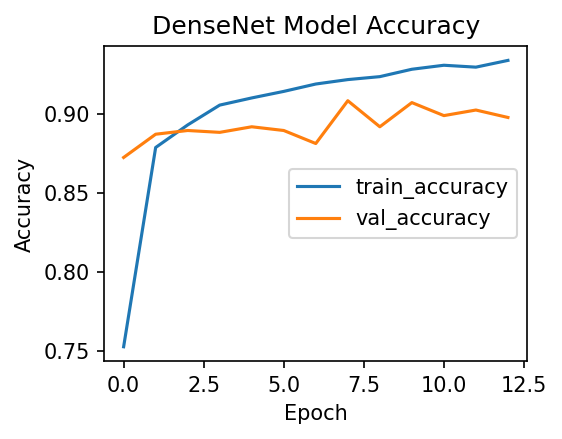

In [63]:
# Calling the Accuracy function for DenseNet Model
getEvaluationAccuracyGraph(densenetModelHistory,'DenseNet Model Accuracy')

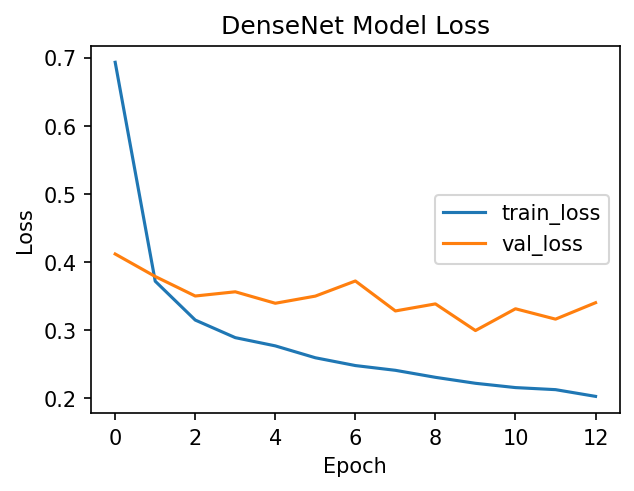

In [64]:
# Calling the Loss function for DenseNet Model
getEvaluationLossGraph(densenetModelHistory,'DenseNet Model Loss')

                precision    recall  f1-score   support

        Burger       0.80      0.94      0.87       300
Crispy Chicken       0.92      0.89      0.90       400
         Donut       0.89      0.98      0.93       300
         Fries       0.97      0.83      0.89       400
         Pizza       0.92      0.89      0.90       300

      accuracy                           0.90      1700
     macro avg       0.90      0.90      0.90      1700
  weighted avg       0.90      0.90      0.90      1700

[[283   5   7   2   3]
 [ 25 355   4   5  11]
 [  4   0 293   0   3]
 [ 35   7  20 331   7]
 [  5  20   4   5 266]]


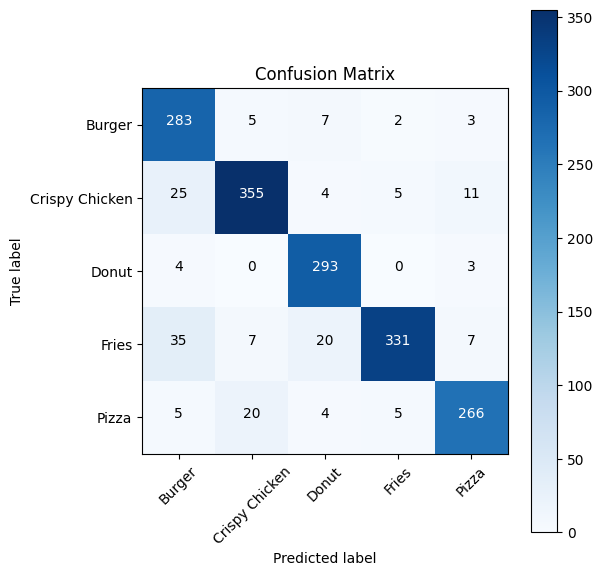

In [65]:
# Classification report and Confusion matrix
densenetPrediction = densenetModel.predict(x = validation_set, verbose=0)
densenetPrediction  = np.argmax(densenetPrediction, axis =1 )

print(classification_report(y_true = validation_set.classes,y_pred = densenetPrediction, target_names = categories))

densenetCM =confusion_matrix(validation_set.classes, densenetPrediction)
plot_confusion_matrix(cm=densenetCM, classes=categories)

### DENSENET121 with Adamax Optimizer

In [66]:
# DenseNet121 Model Architecture
# Load the DenseNet model without the top fully connected layers
densenet_model2 = DenseNet121(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# This is done to avoid training of the model
for layer in densenet_model2.layers:
    layer.trainable = False

# Add a global average pooling layer
x = GlobalAveragePooling2D()(densenet_model2.output)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

# Add a fully connected output layer with multiple classes
predictions = Dense(5, activation='softmax')(x)

# Create the model
densenetModel2 = Model(inputs=densenet_model2.input, outputs=predictions)

# Compile the model
densenetModel2.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
densenetModel2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 206, 206, 3)  0          ['input_8[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 100, 100, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

 conv2_block4_0_relu (Activatio  (None, 50, 50, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 50, 50, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 50, 50, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 50, 50, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 25, 25, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 25, 25, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 25, 25, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 25, 25, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 25, 25, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block10_concat (Concaten  (None, 25, 25, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 25, 25, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 25, 25, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 25, 25, 128)  57344       ['conv3_block11_0_relu[0][0]']   
          

                                                                                                  
 conv4_block2_concat (Concatena  (None, 12, 12, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 12, 12, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 12, 12, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block7_0_relu (Activatio  (None, 12, 12, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 12, 12, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 12, 12, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 12, 12, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block11_1_relu (Activati  (None, 12, 12, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 12, 12, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 12, 12, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 12, 12, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 12, 12, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 12, 12, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 12, 12, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 12, 12, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 12, 12, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 12, 12, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 12, 12, 32)   36864       ['conv4_block20_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 12, 12, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 12, 12, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 12, 12, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_rel

 ization)                                                                                         
                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 6, 6, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 6, 6, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 6, 6, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_blo

 conv5_block8_concat (Concatena  (None, 6, 6, 768)   0           ['conv5_block7_concat[0][0]',    
 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 6, 6, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 6, 6, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 6, 6, 128)    98304       ['conv5_block9_0_relu[0][0]']    
          

 on)                                                                                              
                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 6, 6, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 6, 6, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 6, 6, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

                                                                                                  
 dropout_7 (Dropout)            (None, 512)          0           ['dense_18[0][0]']               
                                                                                                  
 dense_19 (Dense)               (None, 5)            2565        ['dropout_7[0][0]']              
                                                                                                  
Total params: 7,564,869
Trainable params: 527,365
Non-trainable params: 7,037,504
__________________________________________________________________________________________________


In [67]:
# DenseNet Model Training
densenetModelHistory2 = densenetModel2.fit(train_set, epochs=20, validation_data = validation_set, callbacks = cb)

Epoch 1/20
235/235 [==============================] - 134s 551ms/step - loss: 1.0245 - accuracy: 0.6171 - val_loss: 0.6011 - val_accuracy: 0.8294
Epoch 2/20
235/235 [==============================] - 80s 338ms/step - loss: 0.5623 - accuracy: 0.8135 - val_loss: 0.4640 - val_accuracy: 0.8576
Epoch 3/20
235/235 [==============================] - 79s 338ms/step - loss: 0.4581 - accuracy: 0.8477 - val_loss: 0.4236 - val_accuracy: 0.8653
Epoch 4/20
235/235 [==============================] - 79s 335ms/step - loss: 0.4034 - accuracy: 0.8669 - val_loss: 0.4069 - val_accuracy: 0.8712
Epoch 5/20
235/235 [==============================] - 79s 335ms/step - loss: 0.3674 - accuracy: 0.8813 - val_loss: 0.3917 - val_accuracy: 0.8759
Epoch 6/20
235/235 [==============================] - 79s 335ms/step - loss: 0.3567 - accuracy: 0.8875 - val_loss: 0.3794 - val_accuracy: 0.8865
Epoch 7/20
235/235 [==============================] - 80s 339ms/step - loss: 0.3357 - accuracy: 0.8889 - val_loss: 0.3602 - val_a

In [68]:
# DenseNet Model Evaluation
loss,acc = densenetModel2.evaluate(validation_set)
print(f'Obtained accuracy {acc}')

54/54 [==============================] - 14s 265ms/step - loss: 0.3329 - accuracy: 0.8965
Obtained accuracy 0.8964706063270569


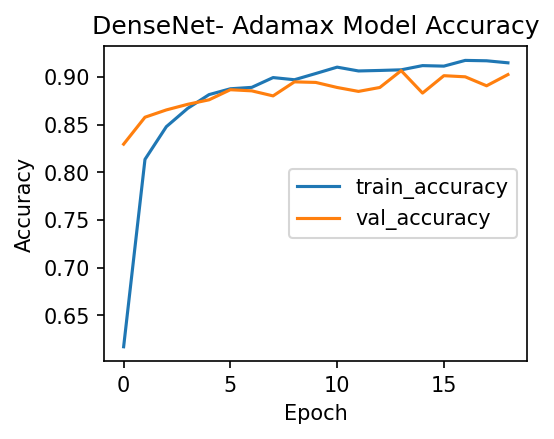

In [69]:
# Calling the Accuracy function for DenseNet Model
getEvaluationAccuracyGraph(densenetModelHistory2,'DenseNet- Adamax Model Accuracy')

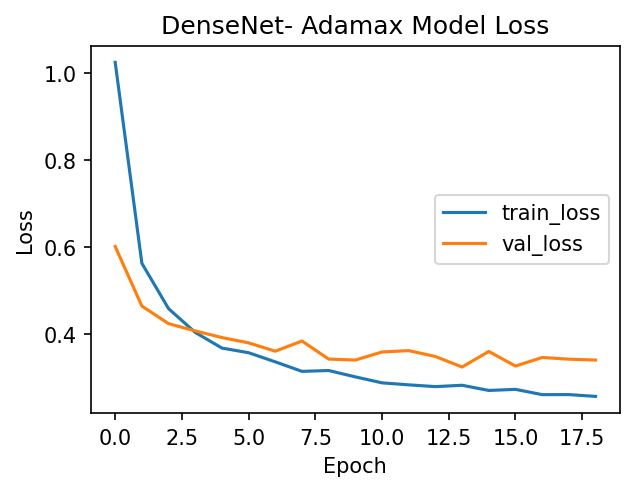

In [70]:
# Calling the Loss function for DenseNet Model
getEvaluationLossGraph(densenetModelHistory2,'DenseNet- Adamax Model Loss')

                precision    recall  f1-score   support

        Burger       0.81      0.92      0.86       300
Crispy Chicken       0.90      0.90      0.90       400
         Donut       0.92      0.94      0.93       300
         Fries       0.96      0.84      0.90       400
         Pizza       0.91      0.91      0.91       300

      accuracy                           0.90      1700
     macro avg       0.90      0.90      0.90      1700
  weighted avg       0.90      0.90      0.90      1700

[[277  11   6   3   3]
 [ 22 360   3   5  10]
 [  5   1 283   2   9]
 [ 32  13  15 335   5]
 [  5  17   2   3 273]]


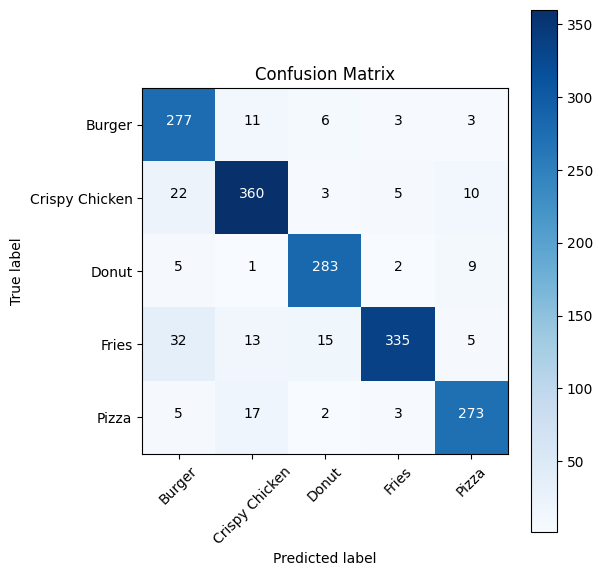

In [71]:
# Classification report and Confusion matrix
densenetPrediction2 = densenetModel2.predict(x = validation_set, verbose=0)
densenetPrediction2  = np.argmax(densenetPrediction2, axis =1 )

print(classification_report(y_true = validation_set.classes,y_pred = densenetPrediction2, target_names = categories))

densenetCM2 =confusion_matrix(validation_set.classes, densenetPrediction2)
plot_confusion_matrix(cm=densenetCM2, classes=categories)

### Summary of Accuracy for the 4 models Using Test Dataset

In [77]:
# Using Test Dataset
loss,acc_base = baseModel.evaluate(test_set)
print(f'Base Model Accuracy {acc_base}')

loss,acc_vgg = vgg16Model.evaluate(test_set)
print(f'VGG16 Model Accuracy {acc_vgg}')

loss,acc_resnet = resnet152Model.evaluate(test_set)
print(f'Resnet152V2 Model Accuracy {acc_resnet}')

loss,acc_resnet2 = resnet152Model2.evaluate(test_set)
print(f'Resnet152V2 - Adamax Model Accuracy {acc_resnet2}')

loss,acc_densenet = densenetModel.evaluate(test_set)
print(f'DenseNet Model Accuracy {acc_densenet}')

loss,acc_densenet2 = densenetModel2.evaluate(test_set)
print(f'DenseNet - Adamax Model Accuracy {acc_densenet2}')

25/25 [==============================] - 2s 70ms/step - loss: 0.7691 - accuracy: 0.7212
Base Model Accuracy 0.7212499976158142
25/25 [==============================] - 2s 82ms/step - loss: 0.4951 - accuracy: 0.8175
VGG16 Model Accuracy 0.8174999952316284
25/25 [==============================] - 3s 123ms/step - loss: 0.3088 - accuracy: 0.9087
Resnet152V2 Model Accuracy 0.9087499976158142
25/25 [==============================] - 3s 123ms/step - loss: 0.3830 - accuracy: 0.8763
Resnet152V2 - Adamax Model Accuracy 0.8762500286102295
25/25 [==============================] - 2s 72ms/step - loss: 0.2442 - accuracy: 0.9325
DenseNet Model Accuracy 0.9325000047683716
25/25 [==============================] - 2s 72ms/step - loss: 0.2675 - accuracy: 0.9175
DenseNet - Adamax Model Accuracy 0.9175000190734863


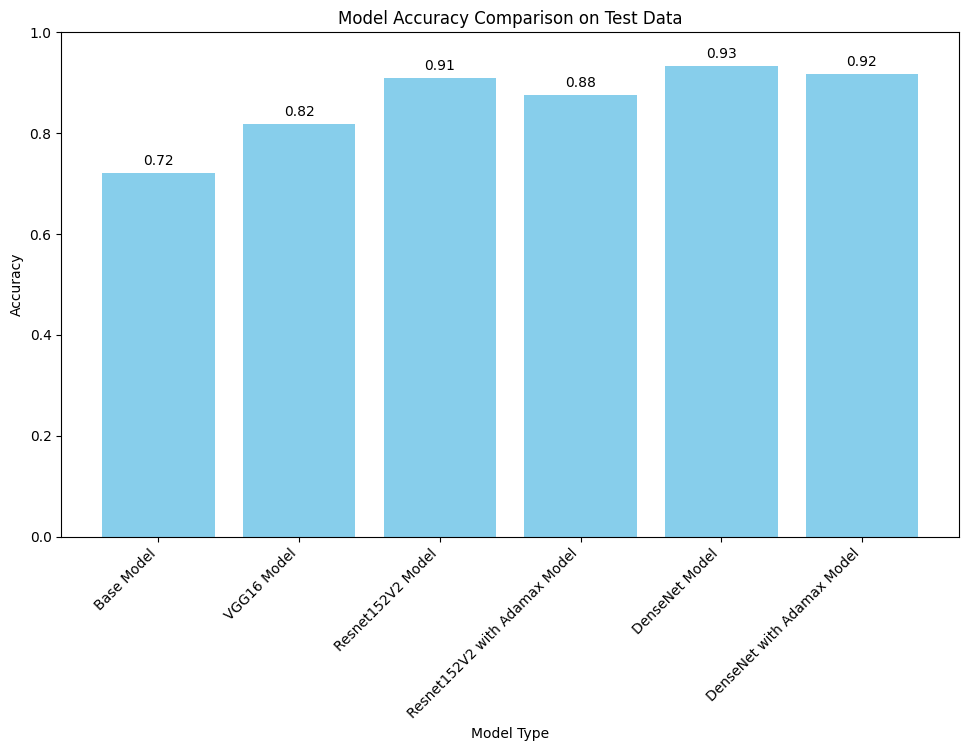

In [80]:
# Define the model names and their corresponding accuracies
model_names = ["Base Model", "VGG16 Model", "Resnet152V2 Model", "Resnet152V2 with Adamax Model", "DenseNet Model", "DenseNet with Adamax Model"]
accuracies = [acc_base, acc_vgg, acc_resnet, acc_resnet2, acc_densenet, acc_densenet2]

# Create a bar plot to display the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison on Test Data')
plt.ylim([0, 1])  # Set the y-axis limit from 0 to 1 for accuracy

# Display the accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()